# Task 6.6 Time Series Analysis

1.  Importing libraries and data
2.  Reviewing dataset
3.  Creating Subset, Wrangling, and Cleaning Data
4.  Time Series Analysis:  Decomposition
5.  Dickey-Fuller Test
6.  Autocorrelation
7.  Stationarizing the Data
8.  Exporting the Data

# 1. Importing libraries and data

In [2]:
# importing libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how plots will appear. 

In [3]:
# importing dataset
df = pd.read_csv(r'C:\Users\there\Desktop\Achievement 6\02 Data\Original Data\homelessness_usa.csv', index_col=False)

# 2. Reviewing dataset

In [4]:
df.head()

,year,sheltered,unsheltered,total
0,2007,391401,255857,647258
1,2008,386361,253423,639784
2,2009,403308,226919,630227
3,2010,403543,233534,637077
4,2011,392316,231472,623788


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   year         12 non-null     int64
 1   sheltered    12 non-null     int64
 2   unsheltered  12 non-null     int64
 3   total        12 non-null     int64
dtypes: int64(4)
memory usage: 512.0 bytes


In [6]:
df.shape

(12, 4)

In [7]:
type(df)

pandas.core.frame.DataFrame

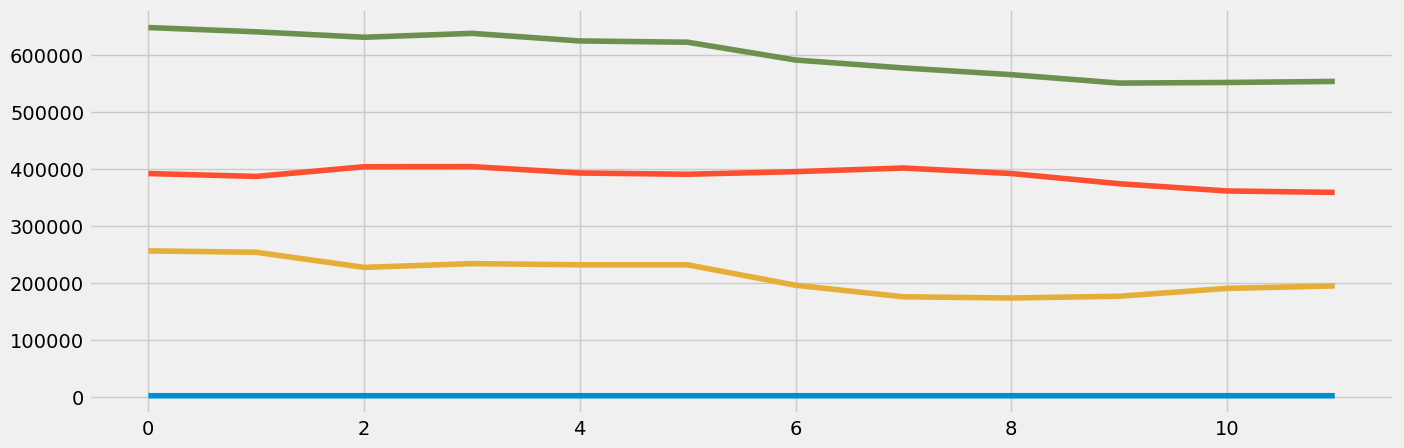

In [9]:
# plotting the data with matplotlib
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df)

# 3. Creating Subsets, Wrangling, and Cleaning Data

In [83]:
# creating a new dataframe for total homeless counts
df2 = df[['year', 'total']]

**Why was this subset created?** This was created because in our main data set for this project focuses on Homeless Individuals. It is not broken down into unsheltered or sheltered; therefore, at this point, it would be more relevant to use the total number of homeless rather than a particular subset like sheltered/unsheltered.   

*Note While I tried to look for a dataset for the number of homeless in California for this time series analysis, I could not find one.  The numbers that are reflected in this dataset is for the United States. It would be interesting to be able to compare the homeless population of California to the rest of the states as there are certain states that have more homeless people, which could have an affect on hospital trends.*

Dataset is from https://datahub.io/gavram/homelessness#readme

In [86]:
# viewing total dataframe
df2

,year,total
0,2007,647258
1,2008,639784
2,2009,630227
3,2010,637077
4,2011,623788
5,2012,621553
6,2013,590364
7,2014,576450
8,2015,564708
9,2016,549928


In [87]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    12 non-null     int64
 1   total   12 non-null     int64
dtypes: int64(2)
memory usage: 320.0 bytes


In [88]:
# converting year column to date-time
df2['year'] = pd.to_datetime(df2['year'])

In [89]:
# set the year column as the index
df2 = df2.set_index('year')

In [90]:
df2

,total
year,
1970-01-01 00:00:00.000002007,647258
1970-01-01 00:00:00.000002008,639784
1970-01-01 00:00:00.000002009,630227
1970-01-01 00:00:00.000002010,637077
1970-01-01 00:00:00.000002011,623788
1970-01-01 00:00:00.000002012,621553
1970-01-01 00:00:00.000002013,590364
1970-01-01 00:00:00.000002014,576450
1970-01-01 00:00:00.000002015,564708


In [91]:
# we need to reset the index to wrangle year column. 
df2 = df_total.reset_index()

In [92]:
df2

,year,total
0,1970-01-01 00:00:00.000002007,647258
1,1970-01-01 00:00:00.000002008,639784
2,1970-01-01 00:00:00.000002009,630227
3,1970-01-01 00:00:00.000002010,637077
4,1970-01-01 00:00:00.000002011,623788
5,1970-01-01 00:00:00.000002012,621553
6,1970-01-01 00:00:00.000002013,590364
7,1970-01-01 00:00:00.000002014,576450
8,1970-01-01 00:00:00.000002015,564708
9,1970-01-01 00:00:00.000002016,549928


In [93]:
# viewing datatype for year column
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    12 non-null     datetime64[ns]
 1   total   12 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 320.0 bytes


In [94]:
# converting data type to string to extract the year. 
df2['year']=df2['year'].astype('str')

In [95]:
# extract the last 4 of the year to get the year. 
df2['year'] = df2['year'].str[-4:]
df2

,year,total
0,2007,647258
1,2008,639784
2,2009,630227
3,2010,637077
4,2011,623788
5,2012,621553
6,2013,590364
7,2014,576450
8,2015,564708
9,2016,549928


In [96]:
# convert the year datatype string back to date/time
df2['year'] = pd.to_datetime(df2['year'])

In [97]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    12 non-null     datetime64[ns]
 1   total   12 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 320.0 bytes


In [98]:
df2.head()

,year,total
0,2007-01-01,647258
1,2008-01-01,639784
2,2009-01-01,630227
3,2010-01-01,637077
4,2011-01-01,623788


In [99]:
# resetting the year column to be the index
df2=df2.set_index('year')

In [100]:
df2

,total
year,
2007-01-01,647258
2008-01-01,639784
2009-01-01,630227
2010-01-01,637077
2011-01-01,623788
2012-01-01,621553
2013-01-01,590364
2014-01-01,576450
2015-01-01,564708


In [103]:
# renaming total column to be more transparent
df2.rename(columns={'total':'Total Homeless'}, inplace=True)

In [104]:
df2

,Total Homeless
year,
2007-01-01,647258
2008-01-01,639784
2009-01-01,630227
2010-01-01,637077
2011-01-01,623788
2012-01-01,621553
2013-01-01,590364
2014-01-01,576450
2015-01-01,564708


In [106]:
# checking for missing values
df2.isnull().sum() # no missing values

Total Homeless    0
dtype: int64

In [107]:
# checking for duplicates
df2_dups = df2.duplicated()
df2_dups.sum() # no duplicates

0

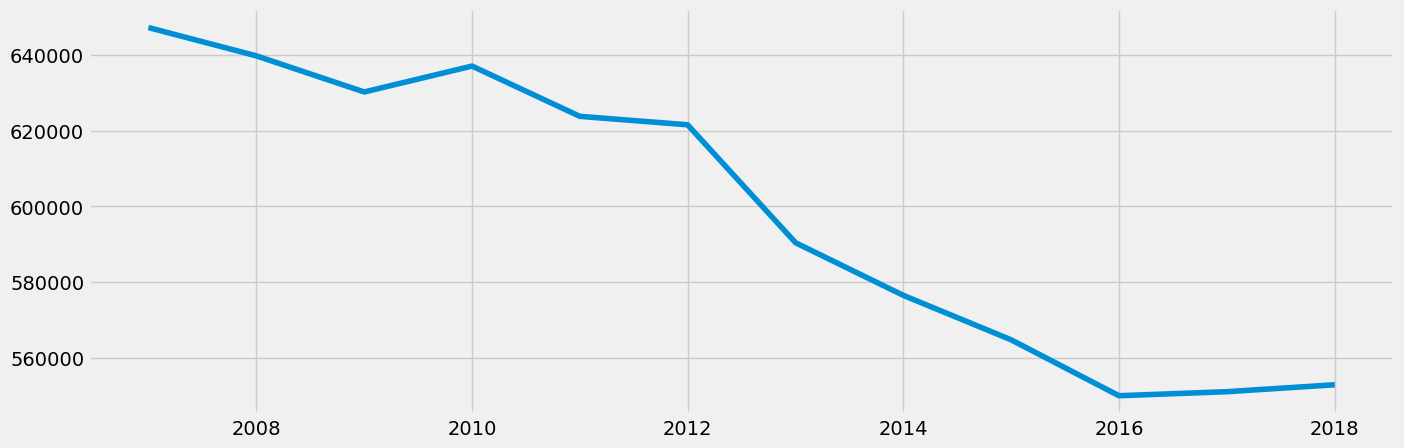

In [110]:
# plot the new dataset
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df2)

# 4. Time Series Analysis:  Decomposition

In [112]:
# decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(df2,model='additive')
from pylab import rcParams # this defines a fixed size for all special charts
rcParams['figure.figsize']=18,7

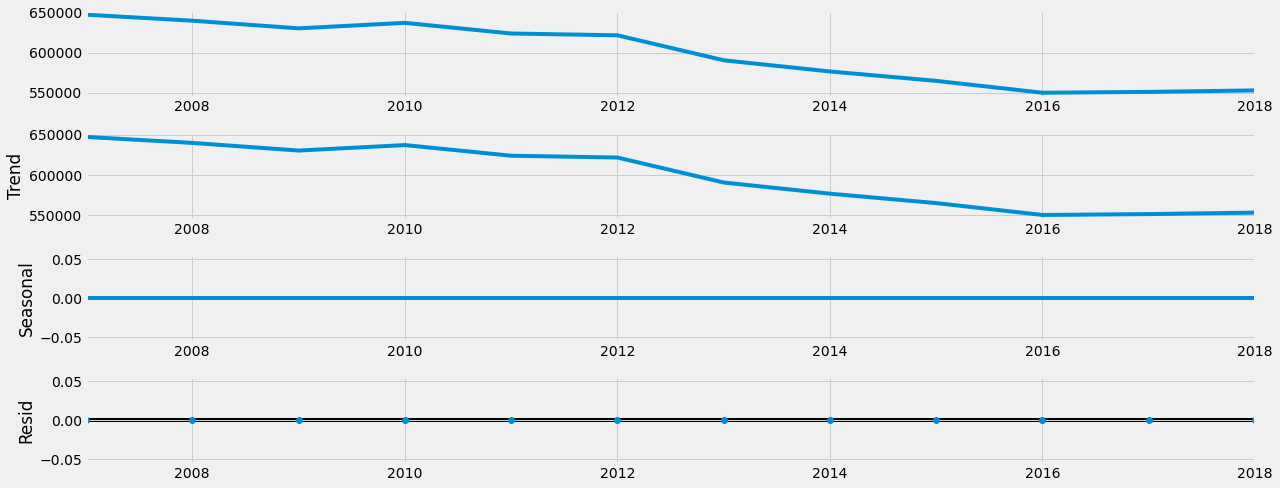

In [113]:
# plotting the separate components
decomposition.plot()
plt.show()

Analysis of Decomposition: 

1) There is a downward trend in homeless numbers since 2008

2) There is no seasonality

3) There is little noise left over after the trend and seasonality have been extracted

# 5. Dickey Fuller Testing

**Null Hypothesis:** There is a unit root.  

**Alternate Hypothesis:** There is no unit root 

In [114]:
# the adfuller() function will import from the model from statsmodels for the test; however, running it will only return an array of numbers.  This is why you need to define a function that prints the correct output for the array. 

from statsmodels.tsa.stattools import adfuller # Importing the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

In [115]:
# apply the test using the function on the time series
dickey_fuller(df2['Total Homeless'])

Dickey-Fuller Stationarity test:
Test Statistic                 -0.532647
p-value                         0.885487
Number of Lags Used             0.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64


Since the test statistic is larger than the critical values we cannot reject the null hypothesis.  This indicates that the data is non-stationary and we will need to stationarize the data. 

# 6. Autocorrelation

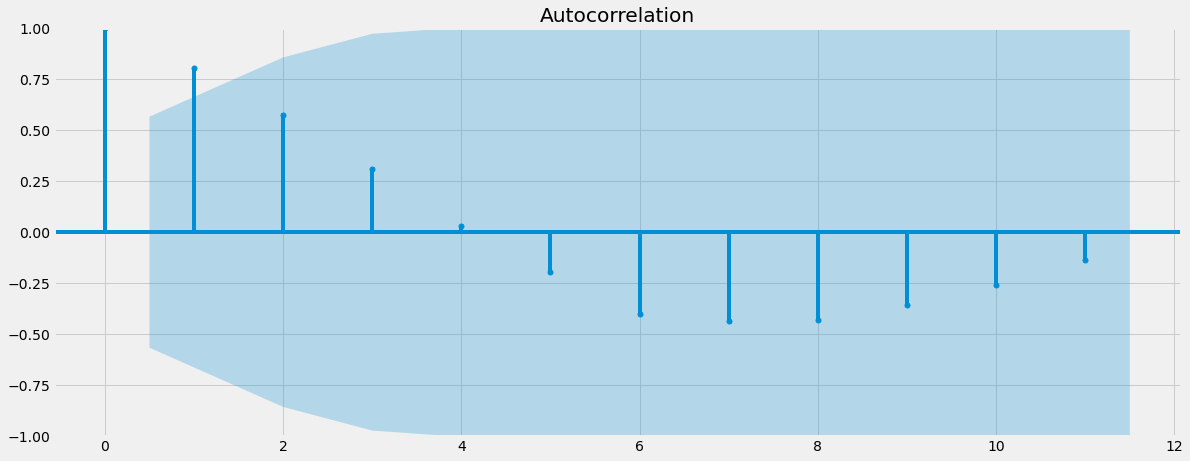

In [116]:
# check out plot of autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # here, we are importing the autocorrelation and partial
#correlation plots
plot_acf(df2)
plt.show()

Results:  Autocorrelation does show the data to be non-stationary. 

# 7. Stationarizing the Data using Differencing

In [117]:
#stationarize the dataframe using differencing
df2_diff = df2-df2.shift(1) # the df.shift(1) function turns the observation to t-1, making the whole thing t-(t-1)

In [118]:
# viewing output
df2_diff.shape

(12, 1)

In [119]:
# removing any missing values that came about as a result of the differencing. 
df2_diff.dropna(inplace=True)

In [121]:
df2_diff.head()

,Total Homeless
year,
2008-01-01,-7474.0
2009-01-01,-9557.0
2010-01-01,6850.0
2011-01-01,-13289.0
2012-01-01,-2235.0


In [122]:
df2_diff.columns

Index(['Total Homeless'], dtype='object')

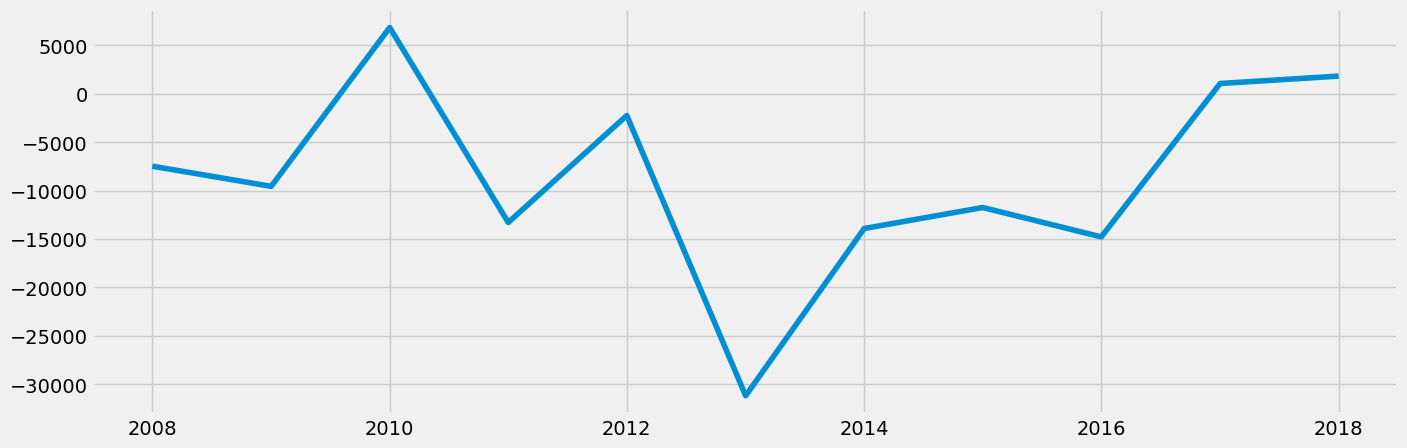

In [123]:
# checking out the difference to the time series curve. 
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df2_diff)

In [124]:
# rerunning the Dickey Fuller test with stationarized data
dickey_fuller(df2_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -2.857021
p-value                         0.050579
Number of Lags Used             0.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64


Results:  We have a satisfactory p-value of 0.05, and our test statistic is smaller than the 10% critical value; therefore, we can reject the null hypothesis and consider the data stationary. 

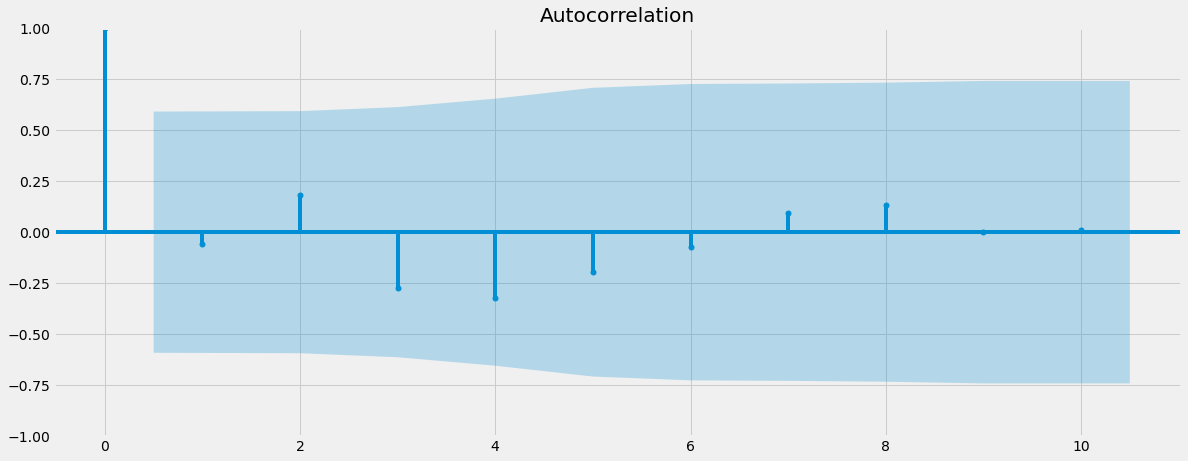

In [125]:
# checking the autocorrelation with stationarized data
plot_acf(df2_diff)
plt.show()

Results:  There is no autocorrelation after we standardized the data, and therefore the data is also reflecting non-stationary. We are okay to proceed with forecasting. 

# 8.  Exporting the Data

In [126]:
df2_diff.to_csv(r'C:\Users\there\Desktop\Achievement 6\02 Data\Prepared Data\6.6_Stationarized_Homeless_TimeSeries.csv')

In [127]:
df2.to_csv(r'C:\Users\there\Desktop\Achievement 6\02 Data\Prepared Data\6.6_Homeless_TimeSeries.csv')